In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [27]:
df=pd.read_csv(r'student_depression.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [28]:
df.columns = df.columns.str.strip()
df.drop(columns=['id','Degree','City','Profession'],inplace=True)

In [29]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,5,0,8.97,2,0,'5-6 hours',Healthy,Yes,3,1,No,1
1,Female,24,2,0,5.90,5,0,'5-6 hours',Moderate,No,3,2,Yes,0
2,Male,31,3,0,7.03,5,0,'Less than 5 hours',Healthy,No,9,1,Yes,0
3,Female,28,3,0,5.59,2,0,'7-8 hours',Moderate,Yes,4,5,Yes,1
4,Female,25,4,0,8.13,3,0,'5-6 hours',Moderate,Yes,1,1,No,0


In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,Sleep Duration_'7-8 hours',...,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2,Financial Stress_3,Financial Stress_4,Financial Stress_5,Financial Stress_?,Family History of Mental Illness_Yes
0,33,5,0,8.97,2,0,3,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1,24,2,0,5.90,5,0,3,0,False,False,...,True,False,False,False,True,False,False,False,False,True
2,31,3,0,7.03,5,0,9,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,28,3,0,5.59,2,0,4,1,False,True,...,True,False,False,True,False,False,False,True,False,True
4,25,4,0,8.13,3,0,1,0,False,False,...,True,False,False,True,False,False,False,False,False,False


In [32]:
x=df.drop('Depression',axis=1)
y=df['Depression']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
len(x_train)

19530

In [36]:
len(x_test)

8371

In [37]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [38]:
model.fit(x_train,y_train)

MultinomialNB()

In [39]:
y_pred=model.predict(x_test)

In [40]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2469 1061]
 [ 566 4275]]


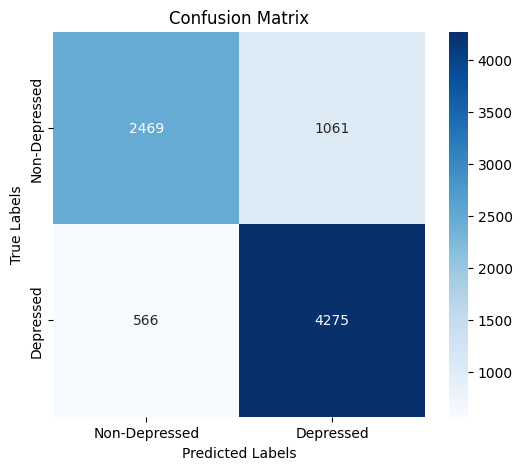

In [41]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depressed', 'Depressed'], yticklabels=['Non-Depressed', 'Depressed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
model.score(x_test,y_test)

0.8062358141201768